# CSE185 Lab 6 Report - Code Documentation (10 pts)

* Document any commands used or additional analysis steps below!
* You should include enough detail that the instructors (or your future self) could come back to this several months from now and know exactly what you did and why you did it.
* We will not run this notebook, but will look back to see what you did especially if you end up with different answers.

In [27]:
# We had to add the install path to sys.path to get these imports to work
import sys
import os
sys.path.append(os.environ["HOME"]+"/.local/lib/python3.9/site-packages")

# Import the libraries we installed
import scanpy as sc, anndata as ad
import harmonypy
import leidenalg

#this is printing all the versions of everything
sc.logging.print_versions()

DATADIR=os.environ["HOME"]+"/public/lab6"
dataset = sc.read_10x_mtx(DATADIR, prefix="GSM5114461_S6_A11_", cache=True)

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 8.3.1
anyio               NA
attr                21.2.0
babel               2.9.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.2
brotli              NA
certifi             2022.12.07
cffi                1.14.6
chardet             4.0.0
charset_normalizer  2.0.0
cloudpickle         1.6.0
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.06.2
dateutil            2.8.2
debugpy             1.6.7
decorator           5.0.9
defusedxml          0.7.1
entrypoints         0.3
fastjsonschema      NA
fsspec              2021.07.0
google              NA
h5py                3.3.0
harmonypy           NA
idna                3.1
igraph              0.11.5
ipykernel           6.17.1
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              3.0.1
joblib              1.0.

In [28]:
DATADIR=os.environ["HOME"]+"/public/lab6"
dsets = ["GSM5114461_S6_A11", "GSM5114464_S7_D20", "GSM5114474_M3_E7"]
ads = {}
for ds in dsets:
    print(ds)
    ads[ds] = sc.read_10x_mtx(DATADIR, prefix=ds+"_", cache=True)
combine = ad.concat(ads, label="dataset")
combine.obs_names_make_unique()

GSM5114461_S6_A11
GSM5114464_S7_D20
GSM5114474_M3_E7


/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [29]:
combine # will print out the dimensions of the combined dataset loaded



AnnData object with n_obs × n_vars = 12357 × 20621
    obs: 'dataset'

In [30]:
ads["GSM5114461_S6_A11"] # will print out dimensions of one of the individual datasets


AnnData object with n_obs × n_vars = 4793 × 20621
    var: 'gene_ids', 'feature_types'

In [31]:
combine.obs # will print out info about each cell. 
             # You should see a "dataset" column indicating which dataset each cell came from

,dataset
AAACCTGAGAAGGACA,GSM5114461_S6_A11
AAACCTGAGTAAGTAC,GSM5114461_S6_A11
AAACCTGGTCCCGACA,GSM5114461_S6_A11
AAACCTGTCCTAAGTG,GSM5114461_S6_A11
AAACCTGTCGCCTGTT,GSM5114461_S6_A11
...,...
TTTGTCAAGCGTCTAT,GSM5114474_M3_E7
TTTGTCAAGTCGTACT,GSM5114474_M3_E7
TTTGTCAGTCTGATTG,GSM5114474_M3_E7
TTTGTCATCCCGGATG,GSM5114474_M3_E7


Question 2: Filter out the cells that have less than 200 genes expressed, cells that have less than 1000 total reads, genes that are detected in less than 5 cells, and genes that have a total count of less than 15. You may find the functions

In [40]:
import scanpy

sc.pp.filter_cells(combine, min_counts=1000)
scanpy.pp.filter_cells(combine, min_genes=200,inplace=True, copy=False)

scanpy.pp.filter_genes(combine, min_counts=15, inplace=True, copy=False)
scanpy.pp.filter_genes(combine, min_cells=5, inplace=True, copy=False)

#filtering for GSM5114461_S6_A11
scanpy.pp.filter_cells(ads["GSM5114461_S6_A11"], min_counts=1000)
scanpy.pp.filter_cells(ads["GSM5114461_S6_A11"], min_genes=200,inplace=True, copy=False)

scanpy.pp.filter_genes(ads["GSM5114461_S6_A11"], min_counts=15, inplace=True, copy=False)
scanpy.pp.filter_genes(ads["GSM5114461_S6_A11"], min_cells=5, inplace=True, copy=False)

#filtering for GSM5114464_S7_D20
scanpy.pp.filter_cells(ads["GSM5114464_S7_D20"], min_counts=1000)
scanpy.pp.filter_cells(ads["GSM5114464_S7_D20"], min_genes=200,inplace=True, copy=False)

scanpy.pp.filter_genes(ads["GSM5114464_S7_D20"], min_counts=15, inplace=True, copy=False)
scanpy.pp.filter_genes(ads["GSM5114464_S7_D20"], min_cells=5, inplace=True, copy=False)

#filtering for GSM5114474_M3_E7
scanpy.pp.filter_cells(ads["GSM5114474_M3_E7"], min_counts=1000)
scanpy.pp.filter_cells(ads["GSM5114474_M3_E7"], min_genes=200,inplace=True, copy=False)

scanpy.pp.filter_genes(ads["GSM5114474_M3_E7"], min_counts=15, inplace=True, copy=False)
scanpy.pp.filter_genes(ads["GSM5114474_M3_E7"], min_cells=5, inplace=True, copy=False)

In [41]:
print("GSM5114464_S7_D20")
adatas["GSM5114464_S7_D20"] # will print out dimensions of one

# print("GSM5114461_S6_A11")
# adatas["GSM5114461_S6_A11"] # will print out dimensions of one of the individual datasets of the individual datasets

# print("GSM5114474_M3_E7")
# ads["GSM5114474_M3_E7"] # will print out dimensions of one of the individual datasets

GSM5114464_S7_D20


AnnData object with n_obs × n_vars = 3935 × 14824
    obs: 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_counts', 'n_cells'

In [42]:
combine

AnnData object with n_obs × n_vars = 10133 × 15779
    obs: 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_counts', 'n_cells'

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


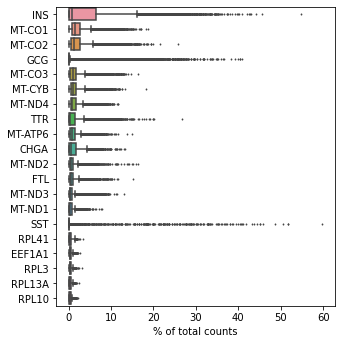

In [43]:
sc.pl.highest_expr_genes(combine, n_top=20)

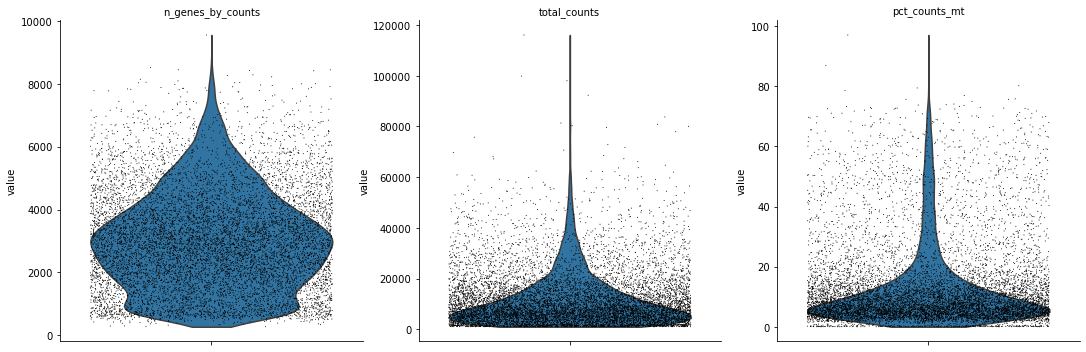

In [46]:
#Question 3 Mitochondria Filtering

# annotate the group of mitochondrial genes as "mt"
combine.var["mt"] = combine.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    combine, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

sc.pl.violin(
    combine,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

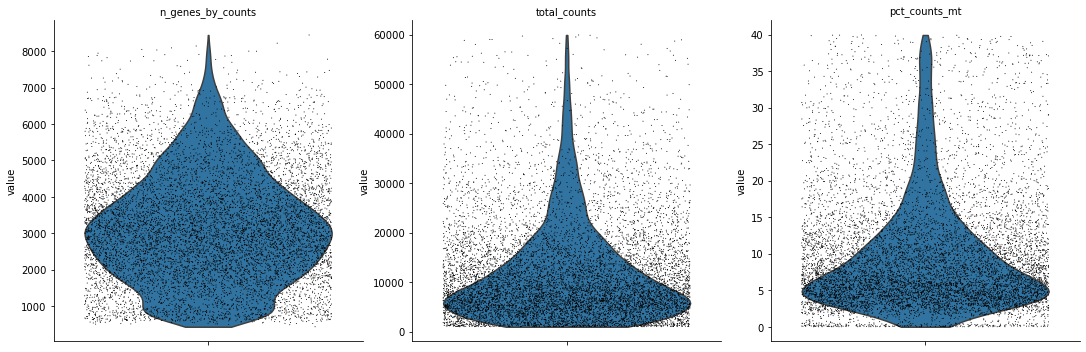

In [47]:
import numpy as np

# Determine the threshold dynamically based on the 25th percentile
threshold = 40
combined_filtered = combine[(combine.obs['pct_counts_mt'] < threshold) & (combine.obs['total_counts']<60000),:]

# Visualize the filtered results
sc.pl.violin(
    combined_filtered,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [48]:
sc.pp.normalize_per_cell(combined_filtered, counts_per_cell_after=1e4) # normalize to 10,000 reads/cell
sc.pp.log1p(combined_filtered) # log transform

/opt/conda/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:524: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


Number of highly variable genes: 500
Top 5 most variable genes:
1. PPY
2. NPY
3. LYZ
4. NTS
5. KRT17


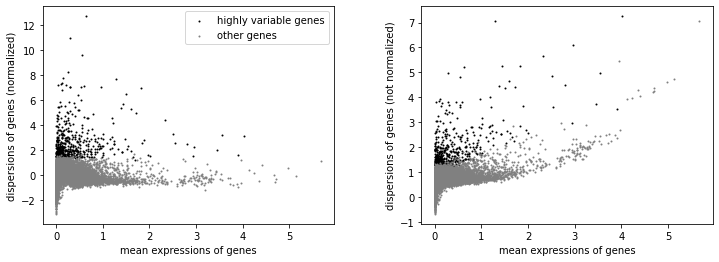

View of AnnData object with n_obs × n_vars = 9348 × 500
    obs: 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'


In [49]:
#adata = combined_filtered
scanpy.pp.highly_variable_genes(combined_filtered, n_top_genes=500, min_disp=0.5, inplace=True, batch_key="dataset", check_values=True)

top_500_genes = combined_filtered.var_names[combined_filtered.var['highly_variable']]

# Print or use these genes as needed
num_highly_variable_genes = combined_filtered.var['highly_variable'].sum()
print("Number of highly variable genes:", num_highly_variable_genes)

sorted_indices = np.argsort(combined_filtered.var['dispersions_norm'])[::-1]

# Then, get the names of the top 5 genes
top_5_genes = combined_filtered.var_names[sorted_indices][:5]
print("Top 5 most variable genes:")
for i, gene in enumerate(top_5_genes, start=1):
    print(f"{i}. {gene}")
# this is plotting them
sc.pl.highly_variable_genes(combined_filtered)

top500 = combined_filtered[:, combined_filtered.var.highly_variable]
print(top500)

In [50]:
# We'll manually add these genes to make sure they stay in our 
# dataset for the analyses below.
genes = ["GCG", "TTR",  "IAPP",  "GHRL", "PPY", "COL3A1",
    "CPA1", "CLPS", "REG1A", "CTRB1", "CTRB2", "PRSS2", "CPA2", "KRT19", "INS","SST","CELA3A", "VTCN1"]

adata_var = combined_filtered[:, (combined_filtered.var.index.isin(genes) | combined_filtered.var["highly_variable"])]

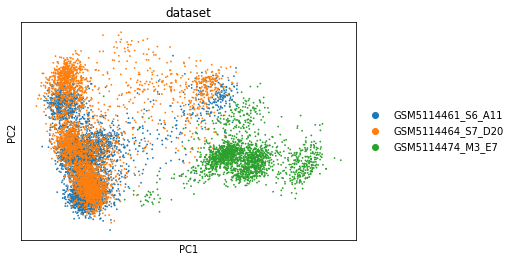

In [51]:
#Question 4:

scanpy.pp.pca(adata_var, n_comps=20)
sc.pl.pca(adata_var, color="dataset")


2024-05-11 04:12:53,816 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
Computing initial centroids with sklearn.KMeans...
2024-05-11 04:12:57,246 - harmonypy - INFO - sklearn.KMeans initialization complete.
sklearn.KMeans initialization complete.
2024-05-11 04:12:57,602 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2024-05-11 04:13:09,206 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2024-05-11 04:13:19,202 - harmonypy - INFO - Iteration 3 of 10
Iteration 3 of 10
2024-05-11 04:13:30,301 - harmonypy - INFO - Iteration 4 of 10
Iteration 4 of 10
2024-05-11 04:13:39,907 - harmonypy - INFO - Iteration 5 of 10
Iteration 5 of 10
2024-05-11 04:13:49,706 - harmonypy - INFO - Converged after 5 iterations
Converged after 5 iterations


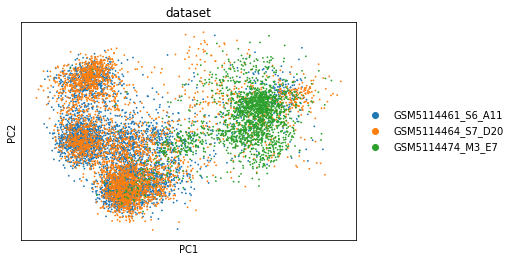

In [52]:
# Import the "external" library
import scanpy.external as sce

# Run harmony using suggested params from the paper
sce.pp.harmony_integrate(adata_var, 'dataset', theta=2, nclust=50,  max_iter_harmony = 10,  max_iter_kmeans=10)

# Reset the original PCs to those computed by Harmony
adata_var.obsm['X_pca'] = adata_var.obsm['X_pca_harmony']
sc.pl.pca(adata_var, color="dataset")

UMAP, CLUSTER


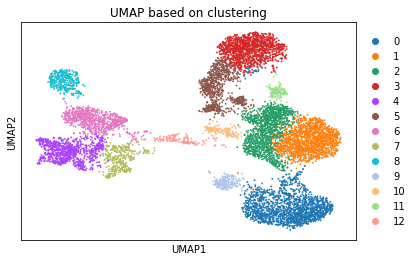

TSNE CLUsTER


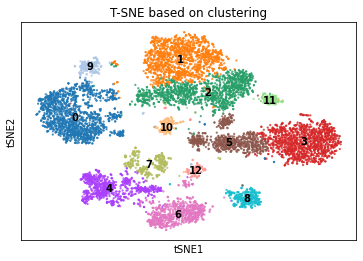

UMAP, DATASET


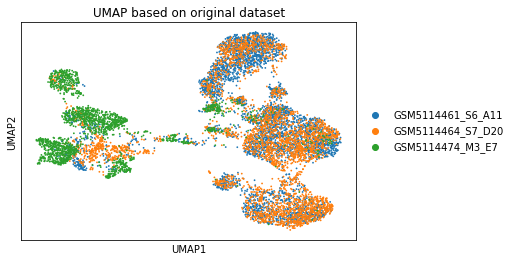

TSNE DATASET


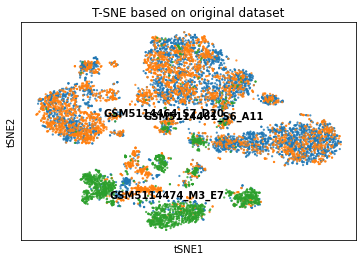

In [53]:
sc.pp.neighbors(adata_var) # computes neighborhood graphs. Needed to run clustering.
sc.tl.leiden(adata_var, resolution =0.5) # clusters cells based on expression profiles. This is needed to color cells by cluster.

#based on cluster
#UMAP
print("UMAP, CLUSTER")
sc.tl.umap(adata_var) # compute UMAP embedding
sc.pl.umap(adata_var, color="leiden", title='UMAP based on clustering') # make the UMAP plot, coloring cells by cluster

#TSNE
print("TSNE CLUsTER")
sc.tl.tsne(adata_var)
sc.pl.tsne(adata_var, color=['leiden'], title = 'T-SNE based on clustering', legend_loc='on data', legend_fontsize=10, alpha=0.8, size=20)

#based on dataset
#UMAP
print("UMAP, DATASET")
sc.tl.umap(adata_var) # compute UMAP embedding
sc.pl.umap(adata_var, color="dataset", title = 'UMAP based on original dataset')

#TSNE
print("TSNE DATASET")
sc.tl.tsne(adata_var)
sc.pl.tsne(adata_var, color=['dataset'], title = 'T-SNE based on original dataset', legend_loc='on data', legend_fontsize=10, alpha=0.8, size=20)


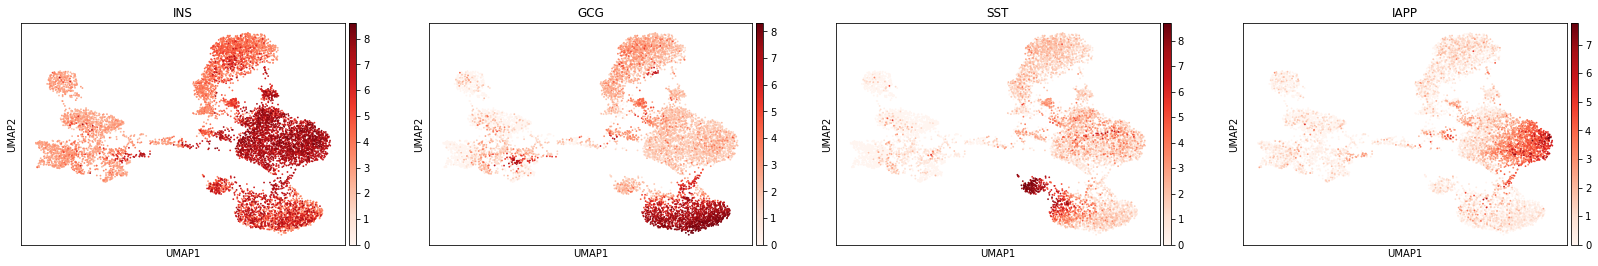

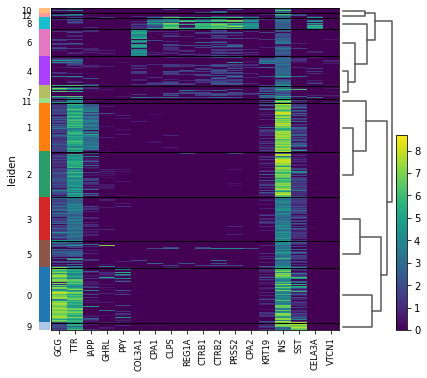

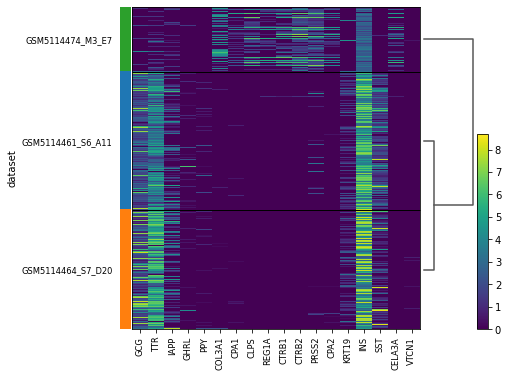

In [67]:
import scanpy.external as sce
genes = ["GCG", "TTR",  "IAPP",  "GHRL", "PPY", "COL3A1",
    "CPA1", "CLPS", "REG1A", "CTRB1", "CTRB2", "PRSS2", "CPA2", "KRT19", "INS","SST","CELA3A", "VTCN1"]
sc.pl.umap(adata_var, color=["INS","GCG","SST", "IAPP"], color_map="Reds")
sc.pl.heatmap(adata_var, genes, groupby='leiden', dendrogram=True)
sc.pl.heatmap(adata_var, genes, groupby='dataset', dendrogram=True)

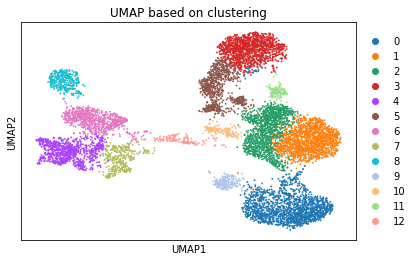

In [66]:
sc.tl.umap(adata_var) # compute UMAP embedding
sc.pl.umap(adata_var, color="leiden", title='UMAP based on clustering') # make the UMAP plot, coloring cells by cluster

For grading purposes only - Do not copy or edit this cell!